In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from GeminiAIService import GeminiAIService
from OpenAIService import OpenAIService
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


In [2]:
LOCATION_PROCESSED = 'data_processed'
FILENAME = 'r_frugal_posts_comparison.csv'

In [3]:
# load file
df = pd.read_csv(f"{LOCATION_PROCESSED}/{FILENAME}")

print("Total submissions: ", len(df))

# get the top 10 posts
df.head()

Total submissions:  1000


,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_text_color,author_flair_type,brand_safe,can_gild,...,is_gallery,collections,call_to_action,poll_data,author_is_blocked,_meta,previous_selftext,is_advice_seeking_openai,is_advice_seeking_altai,is_advice_seeking
0,0.0,McFawesome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN
1,0.0,GodsCasino,NaN,NaN,[],NaN,NaN,text,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,{'retrieved_2nd_on': 1712970521},NaN,False,False,NaN
2,0.0,[deleted],NaN,NaN,NaN,NaN,dark,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN
3,1.0,trippytigeress,NaN,NaN,[],NaN,NaN,text,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN
4,NaN,iwannalynch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN


In [4]:
# service = GeminiAIService()
# # create new column for prediction
# df['is_advice_seeking_altai'] = np.nan

# for index, row in df.iterrows():
#     submission_text = f"{row['title']}"

#     flair = row['link_flair_text']
#     if not pd.isna(flair):
#         submission_text += f"\n{flair}"

#     selftext = row['selftext']
#     if not pd.isna(selftext):
#         submission_text += f"\n{selftext}"
    
#     print(submission_text)
#     print("-----------------------------------")
#     label = service.is_submission_advice_seeking(submission_text)
#     print("GEMINI: Does the user seek advice?: ", label)

#     df.at[index, 'is_advice_seeking_altai'] = label
    
#     print("------------------------------------------------------------------------")

# # save the file
# df.to_csv(f"{LOCATION_PROCESSED}/{FILENAME}", index=False)


In [5]:
# count how many submissions are seeking advice
print(df['is_advice_seeking_altai'].value_counts())

# print percentage of submissions seeking advice
print(df['is_advice_seeking_altai'].value_counts(normalize=True))

print("------------------------------------------------------------------------")
print(df['is_advice_seeking_openai'].value_counts())
print(df['is_advice_seeking_openai'].value_counts(normalize=True))

is_advice_seeking_altai
False    519
True     481
Name: count, dtype: int64
is_advice_seeking_altai
False    0.519
True     0.481
Name: proportion, dtype: float64
------------------------------------------------------------------------
is_advice_seeking_openai
False    535
True     465
Name: count, dtype: int64
is_advice_seeking_openai
False    0.535
True     0.465
Name: proportion, dtype: float64


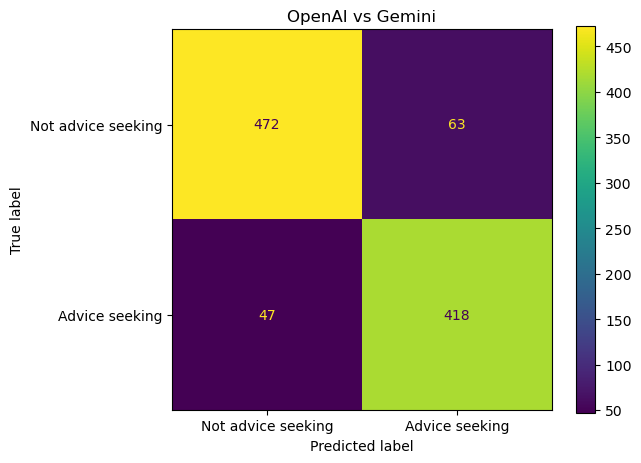

In [6]:
confusion_matrix = metrics.confusion_matrix(df['is_advice_seeking_openai'], df['is_advice_seeking_altai'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Not advice seeking", "Advice seeking"])
cm_display.plot()

# title
plt.title("OpenAI vs Gemini")

plt.tight_layout()

# save
plt.savefig(f'{LOCATION_PROCESSED}/openai_vs_gemini_confusion_matrix.png')

plt.show()

In [7]:
# print out submission where the two services disagree
disagree = df[df['is_advice_seeking_openai'] != df['is_advice_seeking_altai']]
print(disagree)

     archived             author  author_flair_background_color  \
14        NaN   puck_functuation                            NaN   
22        0.0          vuarterrr                            NaN   
37        NaN         Stitchmond                            NaN   
38        0.0             ffcsin                            NaN   
42        NaN          [deleted]                            NaN   
..        ...                ...                            ...   
941       0.0  Idgie-Threadgoode                            NaN   
942       NaN          [deleted]                            NaN   
949       0.0          [deleted]                            NaN   
968       0.0  thesevenyearbitch                            NaN   
990       0.0            Jmingus                            NaN   

    author_flair_css_class author_flair_richtext author_flair_text  \
14                     NaN                   NaN               NaN   
22                     NaN                   NaN       

In [8]:

for index, row in disagree.iterrows():
    submission_text = f"{row['title']}"

    flair = row['link_flair_text']
    if not pd.isna(flair):
        submission_text += f"\n{flair}"

    selftext = row['selftext']
    if not pd.isna(selftext):
        submission_text += f"\n{selftext}"
    
    print(submission_text)
    print("-----------------------------------")
    print("OPENAI: Does the user seek advice?: ", disagree['is_advice_seeking_openai'][index])
    print("GEMINI: Does the user seek advice?: ", disagree['is_advice_seeking_altai'][index])
    print("------------------------------------------------------------------------")


I think it's finally time to finally make the switch to LED lightbulbs.
I've been researching different LED lightbulbs, and I found some [4-watt \(40-watt equivalent\) bulbs](http://amzn.com/B00CPQZLHY) for $7.72 each (free shipping). I currently use 60-watt incandescents pretty much everywhere in my house, but the ones that are on most of the time are my three porch lights, two hallway lights, and the lamp in my livingroom.

The math works out like this:

I estimate these lights are on an average of 16 hours per day (high, I know). This comes out to 480 hours per light per month (average of 30 days per month). With each bulb using 60 watts, that comes out to 28.8 kilowatts used by each bulb each month. In total, 172.8 kilowatts is used to power all six bulbs each month. At $0.10 per kilowatt (my current electricity rate), this means the bulbs are costing me a total of $17.28 per month.

Now, break that down into simple terms:

* 16(hours per day)*365/12(days in month)=486.67(hr/mo)

*

In [9]:
# load labelled data
LABELLED_FILENAME = 'manually_labeled_data.csv'
df_labelled = pd.read_csv(f"{LOCATION_PROCESSED}/{LABELLED_FILENAME}")
df_labelled.head()

,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_text_color,author_flair_type,brand_safe,can_gild,...,is_gallery,collections,call_to_action,poll_data,author_is_blocked,_meta,previous_selftext,is_advice_seeking_openai,is_advice_seeking,is_advice_seeking_altai
0,0.0,McFawesome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.0,NaN
1,0.0,GodsCasino,NaN,NaN,[],NaN,NaN,text,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,{'retrieved_2nd_on': 1712970521},NaN,False,0.0,NaN
2,0.0,[deleted],NaN,NaN,NaN,NaN,dark,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,-1.0,NaN
3,1.0,trippytigeress,NaN,NaN,[],NaN,NaN,text,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,-1.0,NaN
4,NaN,iwannalynch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,-1.0,NaN


In [10]:
# print value counts for is_advice_seeking
print(df_labelled['is_advice_seeking'].value_counts())

is_advice_seeking
 1.0    57
-1.0    54
 0.0    39
Name: count, dtype: int64


In [11]:
# convert 1, 0, -1 to True, False, None
df_labelled['is_advice_seeking'] = df_labelled['is_advice_seeking'].map({1: True, 0: False, -1: None})

is_advice_seeking
True     57
False    39
Name: count, dtype: int64
96
0       True
1      False
6       True
7      False
8       True
       ...  
139     True
140    False
144     True
145     True
149     True
Name: is_advice_seeking, Length: 96, dtype: object
object
is_advice_seeking_openai
True     55
False    41
Name: count, dtype: int64
96
0       True
1      False
6       True
7      False
8       True
       ...  
139     True
140    False
144     True
145     True
149     True
Name: is_advice_seeking_openai, Length: 96, dtype: bool
bool


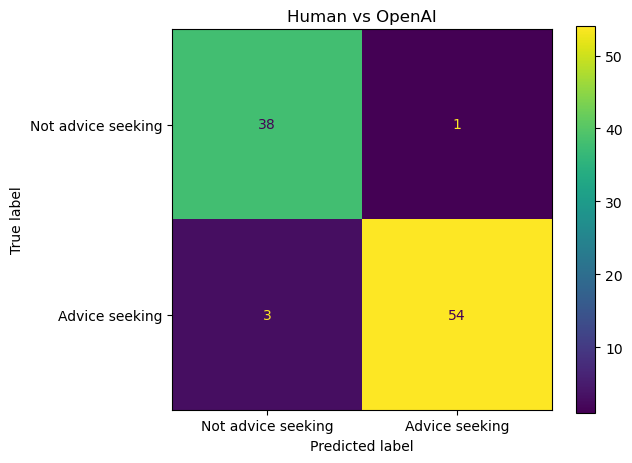

In [12]:

# filter only the labelled data that is not None
df_labelled = df_labelled[df_labelled['is_advice_seeking'].notnull()]


print(df_labelled['is_advice_seeking'].value_counts())
print(len(df_labelled))
print(df_labelled['is_advice_seeking'])
# print type of is_advice_seeking
print(df_labelled['is_advice_seeking'].dtypes)
# cast to boolean
df_labelled['is_advice_seeking'] = df_labelled['is_advice_seeking'].astype(bool)

# filter based on the ids in the labelled data
df_openai_filtered = df[df['id'].isin(df_labelled['id'])]
print(df_openai_filtered['is_advice_seeking_openai'].value_counts())
print(len(df_openai_filtered))
print(df_openai_filtered['is_advice_seeking_openai'])
print(df_labelled['is_advice_seeking_openai'].dtypes)

# match the order of the labelled data according to id
df_openai_filtered = df_openai_filtered.sort_values(by='id')
df_labelled = df_labelled.sort_values(by='id')

confusion_matrix = metrics.confusion_matrix(df_labelled['is_advice_seeking'], df_openai_filtered['is_advice_seeking_openai'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Not advice seeking", "Advice seeking"])
# set x and y labels
cm_display.plot()
plt.title("Human vs OpenAI")

# set plot to full view
plt.tight_layout()

# save the plot
plt.savefig(f'{LOCATION_PROCESSED}/human_vs_openai_confusion_matrix.png')
plt.show()

is_advice_seeking
True     57
False    39
Name: count, dtype: int64
96
99     False
116     True
120     True
113    False
35      True
       ...  
75      True
86     False
37     False
94      True
51      True
Name: is_advice_seeking, Length: 96, dtype: bool
bool
is_advice_seeking_altai
True     61
False    35
Name: count, dtype: int64
96
0       True
1      False
6       True
7      False
8       True
       ...  
139    False
140    False
144     True
145     True
149     True
Name: is_advice_seeking_altai, Length: 96, dtype: bool
float64


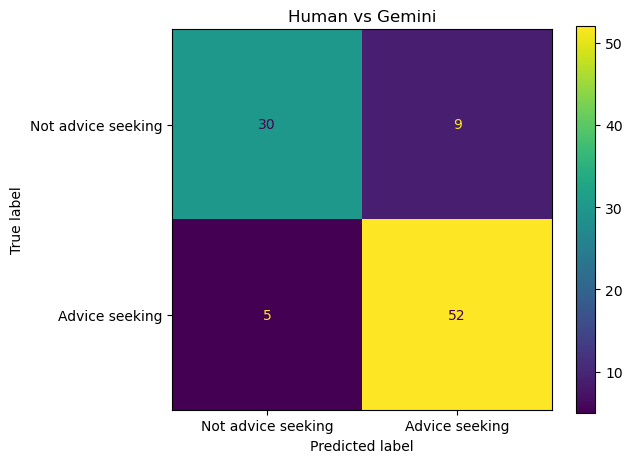

In [13]:

# filter only the labelled data that is not None
df_labelled = df_labelled[df_labelled['is_advice_seeking'].notnull()]


print(df_labelled['is_advice_seeking'].value_counts())
print(len(df_labelled))
print(df_labelled['is_advice_seeking'])
# print type of is_advice_seeking
print(df_labelled['is_advice_seeking'].dtypes)
# cast to boolean
df_labelled['is_advice_seeking'] = df_labelled['is_advice_seeking'].astype(bool)

# filter based on the ids in the labelled data
df_openai_filtered = df[df['id'].isin(df_labelled['id'])]
print(df_openai_filtered['is_advice_seeking_altai'].value_counts())
print(len(df_openai_filtered))
print(df_openai_filtered['is_advice_seeking_altai'])
print(df_labelled['is_advice_seeking_altai'].dtypes)

# match the order of the labelled data according to id
df_openai_filtered = df_openai_filtered.sort_values(by='id')
df_labelled = df_labelled.sort_values(by='id')

confusion_matrix = metrics.confusion_matrix(df_labelled['is_advice_seeking'], df_openai_filtered['is_advice_seeking_altai'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Not advice seeking", "Advice seeking"])
# set x and y labels
cm_display.plot()
plt.title("Human vs Gemini")

# set plot to full view
plt.tight_layout()

# save the plot
plt.savefig(f'{LOCATION_PROCESSED}/human_vs_gemini_confusion_matrix.png')


plt.show()